# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [187]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [188]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


In [189]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Deliverable 1: Get a Summary DataFrame 

In [190]:
#  1. Get the total rides for each city type
df1=pyber_data_df.groupby(by="type")["ride_id"].count().reset_index(name="Total Rides").set_index('type')
df1


,Total Rides
type,
Rural,125
Suburban,625
Urban,1625


In [191]:
# 2. Get the total drivers for each city type
df2=city_data_df.groupby(by="type")["driver_count"].sum().reset_index(name="Total Drivers").set_index('type')
df2

,Total Drivers
type,
Rural,78
Suburban,490
Urban,2405


In [192]:
#  3. Get the total amount of fares for each city type
df3=pyber_data_df.groupby(by="type")["fare"].sum().reset_index(name="Total Fares").set_index('type')
df3

,Total Fares
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [193]:
#  4. Get the average fare per ride for each city type. 
df4=(pyber_data_df.groupby(by="type")["fare"].sum()/pyber_data_df.groupby(by="type")["ride_id"].count()).reset_index(name="Average Fares per ride").set_index('type')
df4

,Average Fares per ride
type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [194]:
# 5. Get the average fare per driver for each city type. 
df5=(pyber_data_df.groupby(by="type")["fare"].sum()/city_data_df.groupby(by="type")["driver_count"].sum()).reset_index(name="Average Fares per Driver").set_index('type')
df5

,Average Fares per Driver
type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [195]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df=pd.concat([df1,df2,df3,df4,df5], axis=1)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per ride,Average Fares per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [196]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per ride,Average Fares per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [197]:
pyber_summary_df.dtypes.astype(str).to_dict()

{'Total Rides': 'int64',
 'Total Drivers': 'int64',
 'Total Fares': 'float64',
 'Average Fares per ride': 'float64',
 'Average Fares per Driver': 'float64'}

In [198]:
#  8. Format the columns.
pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fares per ride"]= pyber_summary_df["Average Fares per ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fares per Driver"]= pyber_summary_df["Average Fares per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per ride,Average Fares per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [199]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.910000e+12,46,Urban


In [200]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df11=pyber_data_df.groupby(by=["type", "date"])["fare"].sum()
df11

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [201]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df12 = df11.reset_index()
df12

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [210]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df13=df12.pivot(index='date',columns='type', values='fare')
df13.index = pd.to_datetime(df13.index)
df13

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [211]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df_jan_thru_apr=df13.loc['2019-01-01':'2019-04-29']
df_jan_thru_apr

C:\Users\reshp\AppData\Local\Temp\ipykernel_94472\1013983844.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_jan_thru_apr=df13.loc['2019-01-01':'2019-04-29']


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [213]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df_jan_thru_apr.index = pd.to_datetime(df_jan_thru_apr.index) #Already done above, it was needed for loc above
df_jan_thru_apr

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [214]:
# 7. Check that the datatype for the index is datetime using df.info()
df_jan_thru_apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [256]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_jan_thru_apr_weekly=df_jan_thru_apr.resample('w').sum()
df_jan_thru_apr_weekly

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [257]:
df_jan_thru_apr_weekly=df_jan_thru_apr_weekly[:-1] #Remove last row

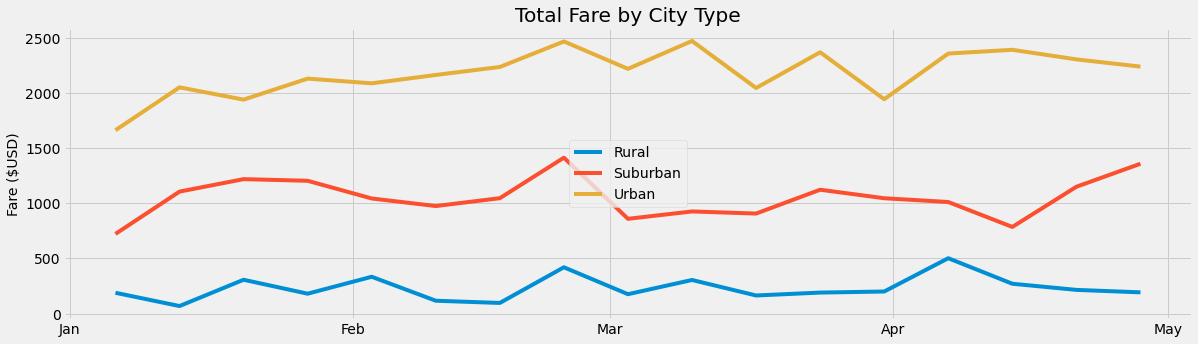

In [263]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 



# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.dates as mdates
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(df_jan_thru_apr_weekly)

ax.set_ylabel('Fare ($USD)',fontsize=14)
#ax.set_xticks(pd.date_range(start = "2019-01-01", end = "2019-04-30", freq="MS")) #optional
ax.set_title("Total Fare by City Type")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.legend(["Rural","Suburban","Urban"])


plt.savefig("PyBer_fare_summary.png")